## 과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
- 목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

### 구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.

In [2]:
import numpy as np

In [3]:
data = np.random.normal(0, 1, 10000)
data[:10]

array([-1.47016206,  1.05568771, -1.36053808, -0.73772256,  0.10438823,
        1.85627766, -0.0310968 ,  0.7369452 , -0.89443434, -0.88482006])

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.

In [4]:
bins = np.linspace(-10, 10, 21)
bins

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.

In [31]:
within_bin = (data[:, np.newaxis] >= bins[:-1]) & (data[:, np.newaxis] < bins[1:])
within_bin.shape
indexes = np.argmax(within_bin, axis=1) + 1
indexes

array([ 9, 12,  9, ..., 10, 10, 11])

In [28]:
indexes = np.digitize(data, bins)
indexes

array([ 9, 12,  9, ..., 10, 10, 11])

In [22]:
list(zip(bins[:-1], bins[1:]))

[(np.float64(-10.0), np.float64(-9.0)),
 (np.float64(-9.0), np.float64(-8.0)),
 (np.float64(-8.0), np.float64(-7.0)),
 (np.float64(-7.0), np.float64(-6.0)),
 (np.float64(-6.0), np.float64(-5.0)),
 (np.float64(-5.0), np.float64(-4.0)),
 (np.float64(-4.0), np.float64(-3.0)),
 (np.float64(-3.0), np.float64(-2.0)),
 (np.float64(-2.0), np.float64(-1.0)),
 (np.float64(-1.0), np.float64(0.0)),
 (np.float64(0.0), np.float64(1.0)),
 (np.float64(1.0), np.float64(2.0)),
 (np.float64(2.0), np.float64(3.0)),
 (np.float64(3.0), np.float64(4.0)),
 (np.float64(4.0), np.float64(5.0)),
 (np.float64(5.0), np.float64(6.0)),
 (np.float64(6.0), np.float64(7.0)),
 (np.float64(7.0), np.float64(8.0)),
 (np.float64(8.0), np.float64(9.0)),
 (np.float64(9.0), np.float64(10.0))]

In [30]:
indices = np.sum(data[:, np.newaxis] > bins, axis=1)
indices

array([ 9, 12,  9, ..., 10, 10, 11])

4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.

In [32]:
counts2 = np.zeros_like(bins)
np.add.at(counts2, indexes, 1)
counts2

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 9.000e+00, 2.290e+02, 1.365e+03, 3.402e+03, 3.385e+03,
       1.367e+03, 2.250e+02, 1.600e+01, 2.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

In [33]:
counts = np.zeros_like(bins)
np.add.at(counts, indices, 1)
counts

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 9.000e+00, 2.290e+02, 1.365e+03, 3.402e+03, 3.385e+03,
       1.367e+03, 2.250e+02, 1.600e+01, 2.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.

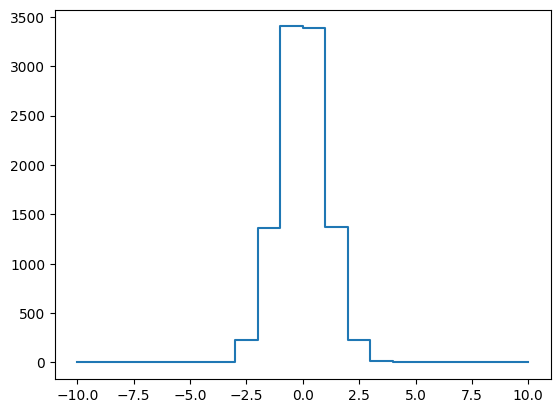

In [35]:
import matplotlib.pyplot as plt
plt.plot(bins, counts, drawstyle='steps')
# plt.plot(bins, counts2, drawstyle='steps')

(array([  12.,  170.,  707., 1978., 2920., 2564., 1231.,  346.,   61.,
          11.]),
 array([-3.68475339, -2.90693504, -2.12911668, -1.35129833, -0.57347997,
         0.20433838,  0.98215673,  1.75997509,  2.53779344,  3.3156118 ,
         4.09343015]),
 <BarContainer object of 10 artists>)

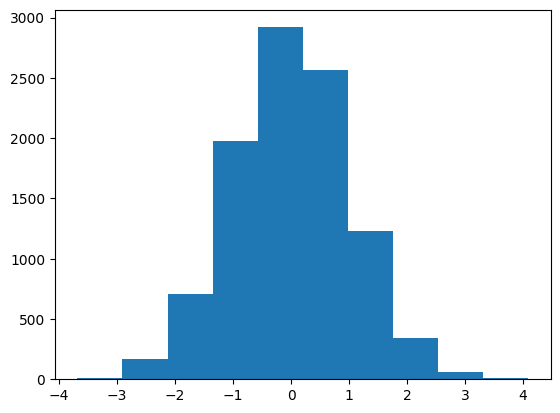

In [17]:
plt.hist(data)